# Week 3: Functions and Packages

### Exercise 1:

An object's weight is given by the following equation:

\begin{equation}
W = mg,
\end{equation}

where $W$ is the weight (in Newtons), $m$ is the mass (in kg) and $g$ is the gravitational acceleration (in N/kg). Write a function that takes in variables m and g and calculates an object's weight.

*(On Earth, the gravitational acceleration has a value of 9.8 N/kg)*

In [3]:
def weight(m, g):
    '''
    Function that calculates an object's weight give
    m: mass in kg (float)
    g: gravitational acceleration in N/kg (float)
    '''
    
    w = m*g
    
    return w
    
mass = 60
grav = 9.8
w = weight(mass, grav)

print(w)
    
print(weight.__doc__)  # print out the function description

588.0

    Function that calculates an object's weight give
    m: mass in kg (float)
    g: gravitational acceleration in N/kg (float)
    


### Exercise 2:

In Exercise 1, we calculated an object's weight in Newtons given their mass in kg and the gravitational acceleration on Earth. However, people don't generally know or care about Newtons, so let's write a function that converts Newtons to pounds using the fact that $1N = 0.224809 lbs$. Your function should take as input the weight in Newtons.

In [4]:
def convert_n_to_lbs(w):
    '''
    Function that converts Newtons to pounds given
    w: weight in Newtons (float)
    '''
    
    lbs = 0.224809*w
    
    return lbs
    
lbs = convert_n_to_lbs(w)

print(lbs)

132.187692


### Exercise 3:

You buy a house for $L$ dollars, for which you obviously need a mortgage. Your mortgage interest rate is $r$ and the amortization period is $n$ months. You will be paying your mortgage monthly. We'll use the following simplified model to compute the fixed monthly payment ($P$) required to fully amortize this loan:

\begin{equation}
P = L \frac{c(1+c)^n}{(1+c)^n - 1},
\end{equation}

where $c$ is the *monthly* interest rate ($c = r/12$).

Your task: Write a function that calculates the fixed monthly payment ($P$) given $L$, $r$, and $n$.

In [9]:
def fixed_payment(L, r, n):
    '''
    Function that calculates the fixed monthly payment required to amortize a loan given
    L: loan value in $ (float)
    r: mortgage interest rate (float)
    n: amortization period in months (int)
    '''
    
    c = r/12
    p = L * (c * (1 + c)**n)/((1 + c)**n - 1)
    
    return p


loan = 235000
r = 0.0187
n = 25*12

fp = fixed_payment(loan, r, n)

print(fp)
    

981.2518710394727


### Exercise 4:

Given an annual taxable income of $x$ dollars, calculate the amount of Canadian federal taxes paid by this individual using the following [simplified model](https://www.canada.ca/en/revenue-agency/services/tax/individuals/frequently-asked-questions-individuals/canadian-income-tax-rates-individuals-current-previous-years.html):

- 15\% on the first $50,197 of taxable income, plus

- 20.5\% on the next $50,195 of taxable income, plus

- 26\% on the next $55,233 of taxable income, plus

- 29\% on the next $66,083 of taxable income, plus

- 33\% of taxable income over $221,708

In [19]:
def federal_taxes(x):
    '''
    Function to calculate the amount of federal taxes paid given
    x: annual taxable income in $CAD (float)
    '''
    taxes = 0
    counter = 0
    while x > 0:
        
        if counter == 0:

            amount = min(50197, x)
            taxes += 0.15*amount
            x -= amount
            print(counter, amount)
            
        elif counter == 1:
            
            amount = min(50195, x)
            taxes += 0.205*amount
            x -= amount
            print(counter, amount)
            
        elif counter == 2:
            
            amount = min(55233, x)
            taxes += 0.26*amount
            x -= amount
            print(counter, amount)
            
        elif counter == 3:
            
            amount = min(66083, x)
            taxes += 0.29*amount
            x -= amount
            print(counter, amount)
            
        elif counter == 4:
            
            amount = x
            taxes += 0.33*amount
            x -= amount
            print(counter, amount)
            
        else:
            print("Something went wrong")
            print("Expected counter < 5")
            break  # This is a useful way to make sure your while loop doesn't turn into an infinite loop!
        
        counter += 1
        
    return taxes
    

income = 150000

taxes = federal_taxes(income)

print("Income:", income)
print("Federal taxes:", round(taxes,2))
print("Income after federal taxes:", round(income-taxes,2))

# Note: the 'round(value, n)' function rounds a value to n decimal places

0 50197
1 50195
2 49608
Income: 150000
Federal taxes: 30717.6
Income after federal taxes: 119282.4


### Exercise 5:

Write a function that takes as input an array of $x$ values, a parameter $\sigma$, and a parameter $\mu$, and returns the following $y$ values:

$$
y = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$

where $\exp(x)$ is the natural exponential function $e^x$ (with $e$ being [Euler's number](https://en.wikipedia.org/wiki/E_(mathematical_constant))).

This function is called the [Gaussian (or Normal) distribution](https://en.wikipedia.org/wiki/Normal_distribution).

In [20]:
import numpy as np

In [4]:
def gaussian(x, sigma, mu):
    '''
    Function that calculates the Gaussian probability centered on mu with standard deviation sigma for a random variable x
    x: random variable (float)
    sigma: Gaussian standard deviation (float)
    mu: Gaussian mean (float)
    '''
    
    f = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(- (x - mu)**2/(2*sigma**2))
    
    return f
    
sigma = 2
mu = 0

low = -(mu + 3*sigma)
high = mu + 3*sigma

x = np.arange(low, high, step=0.01)
y = gaussian(x, sigma, mu)

print(y)

[0.00221592 0.00224939 0.00228329 ... 0.00231766 0.00228329 0.00224939]


In [45]:
# Run the following cell to see what your function looks like in a graph!

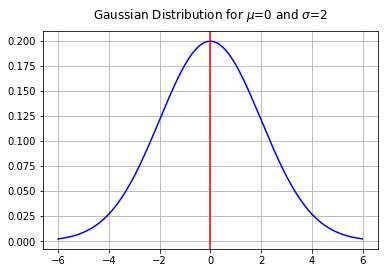

In [46]:
import matplotlib.pyplot as plt

plt.plot(x, y, color='blue')
plt.title(r"Gaussian Distribution for $\mu$="+str(mu)+r" and $\sigma$="+str(sigma), y=1.03)
plt.axvline(mu, color='red')
plt.grid()
plt.show()

### Exercise 6:

Given an array of random x values, we will calculate several statistics, including...

- the mean
- the median
- the standard deviation
- the variance

In [50]:
x = np.random.random(size=1000)

mean = np.mean(x)
med = np.median(x)
std = np.std(x)
var = np.var(x)

print("Mean:", mean)
print("Median:", med)
print("Standard deviation", std)
print("Variance", var)

Mean: 0.4817707209780309
Median: 0.48013716400893264
Standard deviation 0.28309096980006565
Variance 0.08014049718234167


### Exercise 7:

Conservation of energy states that an object's total energy must be conserved at all times. Consider the total mechanical energy of an object:

\begin{equation}
E = K + U
\end{equation}

where $K$ is the object's kinetic energy, and $U$ its potential energy. The kinetic energy is given by:

\begin{equation}
K = \frac{1}{2} m v^2,
\end{equation}

where $m$ is the object's mass (kg) and $v$ is its velocity (m/s). $E$, $K$, and $U$ are all measured in Joules (J).

Your task: You are given the following:

- The object's total energy $E$
- The object's potential energy at several points in time

Write a function to calculate that object's velocity at those times for a given mass $m$.


In [53]:
E = 1000
U = np.array([1000, 900, 700, 450, 200, 0])

def velocity(E, U, m):
    '''
    Function that calculates an object's velocity given
    E: total energy in Joules (float)
    U: potential energy in Joules (float)
    m: mass in kg (float)
    '''
    
    # Kinetic energy
    K = E - U
    
    # Velocity
    v = np.sqrt(2*K/m)
    
    return v
    
mass = 60

v = velocity(E, U, mass)

print(v)

[0.         1.82574186 3.16227766 4.28174419 5.16397779 5.77350269]
